In [22]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import load
import seaborn as sns
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
gdp = load.load_gdp()
gdp_18 = gdp[['Country', 'GDP']].sort_values(by='GDP', ascending=False)

In [16]:
rankings_soccer = load.load_rankings_soccer()
# rankings_soccer.head()

In [17]:
rankings_cricket = load.load_rankings_cricket()

In [18]:
combined = pd.merge(gdp_18, rankings_soccer, on='Country', how='outer').merge(rankings_cricket, on='Country', how='outer')

In [19]:
combined.head()

,Country,GDP,Rank_soccer,Rank_cricket
0,United States,1.948539e+13,30.0,NaN
1,China,1.214349e+13,NaN,NaN
2,Japan,4.859951e+12,29.0,NaN
3,Germany,3.693204e+12,11.0,NaN
4,India,2.652551e+12,101.0,2.0


# plot one against the other

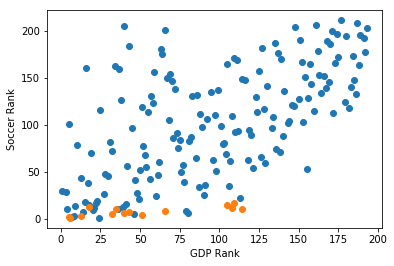

In [23]:
plt.plot(combined.GDP.rank(ascending=False), combined.Rank_soccer, 'o')
plt.plot(combined.GDP.rank(ascending=False), combined.Rank_cricket, 'o')
plt.xlabel('GDP Rank')
plt.ylabel('Soccer Rank')
plt.show()

# plotly plots

In [24]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plot([go.Scatter(x=combined.GDP.rank(ascending=False).tolist(), 
                 y=combined.Rank_soccer.tolist())])

'file:///accounts/projects/vision/chandan/countries-analysis/temp-plot.html'

In [30]:
df = combined
fig = {
    'data': [
          {
          'x': df.GDP, #.rank(ascending=False), 
            'y': df.Rank_soccer, 
            'text': df.Country, 
            'mode': 'markers', 
            'name': '2007'},
    ],
    'layout': {
        'xaxis': {'title': 'GDP', 'type': 'log'},
        'yaxis': {'title': "Soccer Rank"}
    }
}

plot(fig, filename='interactive.html')

'file:///accounts/projects/vision/chandan/countries-analysis/interactive.html'

# plotting using nvd3.js

In [182]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

"""
Examples for Python-nvd3 is a Python wrapper for NVD3 graph library.
NVD3 is an attempt to build re-usable charts and chart components
for d3.js without taking away the power that d3.js gives you.

Project location : https://github.com/areski/python-nvd3
"""

from nvd3 import cumulativeLineChart
import random
import datetime
import time


start_time = int(time.mktime(datetime.datetime(2012, 6, 1).timetuple()) * 1000)
nb_element = 100

# Open File for test
output_file = open('test_cumulativeLineChart.html', 'w')

type = "cumulativeLineChart"
chart = cumulativeLineChart(name=type, height=350, x_is_date=True)
chart.set_containerheader("\n\n<h2>" + type + "</h2>\n\n")

xdata = list(range(nb_element))
xdata = [start_time + x * 1000000000 for x in xdata]
ydata = [i + random.randint(1, 10) for i in range(nb_element)]
ydata2 = [x * 2 for x in ydata]

extra_serie = {"tooltip": {"y_start": "", "y_end": " Calls"}}
chart.add_serie(name="Count", y=ydata, x=xdata, extra=extra_serie)
extra_serie = {"tooltip": {"y_start": "", "y_end": " Min"}}
chart.add_serie(name="Duration", y=ydata2, x=xdata, extra=extra_serie)

chart.buildhtml()

output_file.write(chart.htmlcontent)
# ---------------------------------------

# close Html file
output_file.close()

loaded nvd3 IPython extension
run nvd3.ipynb.initialize_javascript() to set up the notebook
help(nvd3.ipynb.initialize_javascript) for options
